In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base = pd.read_csv("train.csv", delimiter=',')

In [3]:
base

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [5]:
#Separa a base em 70% treino e 30% teste, estratificada pela TARGET, uma vez que ela nao tem uma proporcao equilibrada na base
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(base, test_size=0.3,stratify=base['TARGET'],random_state=42)
train_set.shape, test_set.shape

((53214, 371), (22806, 371))

In [6]:
df = pd.DataFrame(train_set.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train_set.shape[0]
df

,TARGET,Percentage
0,51108,96.042395
1,2106,3.957605


In [7]:
df = pd.DataFrame(test_set.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/test_set.shape[0]
df

,TARGET,Percentage
0,21904,96.0449
1,902,3.9551


In [94]:
#REMOVER COLUNAS IGUAIS
features = train_set.drop(['TARGET','ID'],axis=1)
corr_matrix = features.corr()
corr_matrix.shape

(369, 369)

In [95]:
#como a matriz de correlacao se repete na diagonal superior e inferior, escolhi uma delas 
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)) 

In [96]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] == 1)] 
print(to_drop)

['ind_var18', 'ind_var26', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var32', 'ind_var37', 'ind_var39', 'num_var18', 'num_var26', 'num_var25', 'num_var29_0', 'num_var29', 'num_var32', 'num_var37', 'num_var39', 'saldo_var29', 'delta_num_aport_var33_1y3', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'delta_num_venta_var44_1y3']


In [97]:
print(len(to_drop))

25


In [99]:
features_1 = features.drop(to_drop, axis=1)
train_set_1 = train_set.drop(to_drop, axis=1)
features_1.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
61553,2,38,48.0,102.0,209.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175887.150000
6865,2,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111297.030000
847,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
40817,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80805.900000
71630,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124585.620000


In [101]:
#REMOVER VARIAVEIS CONSTANTES, OU SEJA, COM VARIANCIA ZERO

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(features_1)  # fit encontra variaveis com variancia zero
#get_support() eh um vetor que indica quais variaveis NAO tem variancia zero
to_drop_2 = [column for column in features_1.columns if column not in features_1.columns[sel.get_support()]] 
print(to_drop_2)

['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var13_medio', 'saldo_var28', 'saldo_var27', 'saldo_var34', 'saldo_var41', 'saldo_var46', 'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_reemb_var13_hace3', 'imp_reemb_var17_hace3', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_meses_var13_medio_ult3', 'num_reemb_var13_hace3', 'num_reemb_var17_hace3', 'num_reemb_var33_hace3', 'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo

In [102]:
print(len(to_drop_2))

57


In [103]:
features_2= features_1.drop(to_drop_2, axis=1)
train_set_2 = train_set_1.drop(to_drop_2, axis=1)
features_2.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
61553,2,38,48.0,102.0,209.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175887.150000
6865,2,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111297.030000
847,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
40817,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80805.900000
71630,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124585.620000


In [104]:
features_2.shape

(53214, 287)

In [195]:
#TENTAR DETERMINAR SE AS VARIAVEIS SAO BINARIAS, CATEGORICAS OU CONTINUAS
#PRIMEIRO VERIFICOU-SE A QUANTIDADE DE DOMINIOS DE CADA VARIAVEL DA BASE E TENTOU-SE AGRUPAR POR QUANTIDADE DE DOMINIOS
#BINARIAS: 2 DOMINIOS
#CATEGORICAS ATE 3 DOMINIOS: 3 DOMINIOS
#CONTINUAS: FOI FEITO UM TRABALHO DE VERIFICAR QUAL ERA UMA QUANTIDADE MINIMA DE DOMINIOS NECESSARIOS PARA A VARIAVEL DEIXAR DE SER CATEGORICA E SE TORNAR CONTINUA, INICIOU-SE O TESTE VERIFICANDO SE A QUANTIDADE DE DOMINIOS ERA MAIOR QUE N/2 E FOI-SE DIMINUINDO E VERIFICANDO QUAIS VARIAVEIS ALI TINHAM NOMES PARECIDOS, ALEM DE VERIFICAR SE O DESCRIBE MOSTRAVA VALORES QUEBRADOS OU VALORES INTEIROS.
##VARS COM INICIO DO NOME DA VARIAVEL SALDO, IMP OU DELTA (-1 A 1)
#CATEGORICAS ATE 10 DOMINIOS: DE 4 A 10 DOMINIOS OU VARS COM INICIO DO NOME DA VARIAVEL NUM, REMOVENDO VARIAVEIS COM VALORES NAO INTEIROS (ELAS SE TORNAM CONTINUAS)

#VETORES DE TESTE
vars_bin = []
vars_quasi_bin = []
vars_cat10 = []
vars_cat20 = []
vars_cont = []
vars_cat = []

vars_bin = [columns for columns in features_2.columns if len(features_2[columns].value_counts()) == 2]
print('#Binarias',len(vars_bin))
vars_quasi_bin = [columns for columns in features_2.columns if len(features_2[columns].value_counts()) == 3]
print('#Ate 3 categorias',len(vars_quasi_bin))
vars_cat10 = [columns for columns in features_2.columns if len(features_2[columns].value_counts()) >= 4 and len(features_2[columns].value_counts()) <= 10]
print('#Ate 10 categorias',len(vars_cat10))
vars_cat20 = [columns for columns in features_2.columns if len(features_2[columns].value_counts()) >= 11 and len(features_2[columns].value_counts()) <= 20]
print('#Ate 20 categorias',len(vars_cat20))
#vars_cont = [columns for columns in features_2.columns if len(features_2[columns].value_counts()) > 10 and len(features_2[columns].value_counts()) > int((features_2.shape[0])/500)]
vars_cont = [columns for columns in features_2.columns if len(features_2[columns].value_counts()) > 10 and len(features_2[columns].value_counts()) > 20]
print('#Continuas',len(vars_cont))
vars_cat = [columns for columns in features_2.columns if columns not in vars_bin and columns not in vars_cat20 and columns not in vars_cat10 and columns not in vars_quasi_bin and columns not in vars_cont]
print('#Categoricas',len(vars_cat))
#PREMISSA: TODAS AS 288 VARIAVEIS RESTANTES SAO CONTINUAS
#APARENTEMENTE:
#BINARIAS: com 2 categorias
#CATEGORICAS: com 3 categorias
#CONTINUAS: SALDO ou IMP ou DELTA (-1 A 1)
#CATEGORICAS: NUM ou ate 10 categorias


#Binarias 80
#Ate 3 categorias 21
#Ate 10 categorias 57
#Ate 20 categorias 21
#Continuas 108
#Categoricas 0


In [219]:
var_cat_true = []

var_cat_true = [columns for columns in features_2[vars_cat10].columns if np.array_equal(features_2[columns], features_2[columns].astype(int))]
print(len(var_cat_true))

49


In [ ]:
#QUAL O VALOR MISSING DAS COLUNAS?
#CALCULAR O OUTLIER E VER SE ELES SAO PARECIDOS

In [196]:
dict = {'full': features_2.columns}
colunas = pd.DataFrame(dict)

colunas['abv'] = colunas['full'].str.slice(0,3)
colunas

,full,abv
0,var3,var
1,var15,var
2,imp_ent_var16_ult1,imp
3,imp_op_var39_comer_ult1,imp
4,imp_op_var39_comer_ult3,imp
...,...,...
282,saldo_medio_var44_hace2,sal
283,saldo_medio_var44_hace3,sal
284,saldo_medio_var44_ult1,sal
285,saldo_medio_var44_ult3,sal


In [197]:
colunas.groupby('abv').count()

,full
abv,
del,15
imp,40
ind,54
num,115
sal,58
var,5


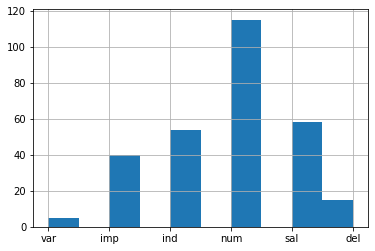

In [198]:
colunas.abv.hist()

In [199]:
colunas.loc[colunas['abv'] == 'var']

,full,abv
0,var3,var
1,var15,var
146,var36,var
193,var21,var
286,var38,var


In [200]:
features_2[['var3','var15','var36','var21','var38']].describe()

,var3,var15,var36,var21,var38
count,53214.000000,53214.000000,53214.000000,53214.000000,5.321400e+04
mean,-1425.484233,33.255966,40.454204,32.934942,1.183134e+05
std,37764.899347,12.982443,47.364656,402.301514,2.003941e+05
min,-999999.000000,5.000000,0.000000,0.000000,5.163750e+03
25%,2.000000,23.000000,2.000000,0.000000,6.777482e+04
50%,2.000000,28.000000,3.000000,0.000000,1.064106e+05
75%,2.000000,40.000000,99.000000,0.000000,1.188215e+05
max,238.000000,105.000000,99.000000,30000.000000,2.203474e+07


In [56]:
colunas.loc[colunas['abv'] == 'del']

,full,abv
148,delta_imp_amort_var18_1y3,del
149,delta_imp_aport_var13_1y3,del
150,delta_imp_aport_var17_1y3,del
151,delta_imp_aport_var33_1y3,del
152,delta_imp_compra_var44_1y3,del
153,delta_imp_reemb_var13_1y3,del
154,delta_imp_reemb_var17_1y3,del
155,delta_imp_trasp_var17_in_1y3,del
156,delta_imp_trasp_var17_out_1y3,del
157,delta_imp_trasp_var33_in_1y3,del


In [57]:
features_2[['delta_imp_amort_var18_1y3','delta_imp_compra_var44_1y3','delta_imp_reemb_var13_1y3','delta_imp_trasp_var17_in_1y3']].describe()

,delta_imp_amort_var18_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_trasp_var17_in_1y3
count,5.321400e+04,5.321400e+04,5.321400e+04,5.321400e+04
mean,1.879205e+05,9.583944e+06,5.449694e+06,7.516819e+05
std,4.334979e+07,3.094340e+08,2.333844e+08,8.669715e+07
min,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10


In [58]:
colunas.loc[colunas['abv'] == 'imp']

,full,abv
3,imp_ent_var16_ult1,imp
4,imp_op_var39_comer_ult1,imp
5,imp_op_var39_comer_ult3,imp
6,imp_op_var40_comer_ult1,imp
7,imp_op_var40_comer_ult3,imp
8,imp_op_var40_efect_ult1,imp
9,imp_op_var40_efect_ult3,imp
10,imp_op_var40_ult1,imp
11,imp_op_var41_comer_ult1,imp
12,imp_op_var41_comer_ult3,imp


In [59]:
features_2[['imp_ent_var16_ult1','imp_op_var39_comer_ult1','imp_op_var40_efect_ult1','imp_op_var40_ult1']].describe()

,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1
count,53214.000000,53214.000000,53214.000000,53214.000000
mean,81.814797,72.122410,0.385842,2.973337
std,1394.204173,336.779889,33.342935,90.842340
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,135000.000000,9968.040000,6600.000000,8237.820000


In [60]:
colunas.loc[colunas['abv'] == 'ind']

,full,abv
20,ind_var1_0,ind
21,ind_var1,ind
22,ind_var5_0,ind
23,ind_var5,ind
24,ind_var6_0,ind
25,ind_var6,ind
26,ind_var8_0,ind
27,ind_var8,ind
28,ind_var12_0,ind
29,ind_var12,ind


In [61]:
features_2[['ind_var1_0','ind_var1','ind_var13_corto_0','ind_var13_corto','ind_var7_emit_ult1','ind_var10_ult1']].describe()

,ind_var1_0,ind_var1,ind_var13_corto_0,ind_var13_corto,ind_var7_emit_ult1,ind_var10_ult1
count,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000
mean,0.011388,0.003627,0.042789,0.041324,0.000056,0.081313
std,0.106106,0.060115,0.202384,0.199040,0.007508,0.273318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [203]:
colunas.loc[colunas['abv'] == 'num']

,full,abv
65,num_var1_0,num
66,num_var1,num
67,num_var4,num
68,num_var5_0,num
69,num_var5,num
...,...,...
246,num_venta_var44_ult1,num
247,num_var45_hace2,num
248,num_var45_hace3,num
249,num_var45_ult1,num


In [204]:
features_2[['num_var1_0','num_var1','num_var4','num_var5_0','num_var5','num_venta_var44_ult1']].describe()

,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_venta_var44_ult1
count,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000
mean,0.034220,0.010881,1.081031,2.895028,1.996787,0.004454
std,0.319108,0.180344,0.914069,0.656832,1.432699,0.259738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000
75%,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000
max,6.000000,3.000000,7.000000,15.000000,15.000000,39.000000


In [208]:
len(features_2['num_var1'].value_counts())

2

In [209]:
features_2['num_var1'].value_counts()

0    53021
3      193
Name: num_var1, dtype: int64

In [206]:
var = train_set_1['num_var1_0'].value_counts()[-999999]
var

KeyError: -999999

In [52]:
#Checando se -999999 eh valor padrao de null na base toda

null_vars = []

for i in train_set_1.columns:
    null_vars[i] = train_set_1[i].value_counts()[-999999]

KeyError: -999999

In [17]:
#Cria coluna de falta de informação
def add_col(set):
    s = 0
    for i in range(set.shape[0]):
        for j in set.columns:
            if set[i][j].isnull():
                s = s + 1
                j = j + 1
        set[i]['IND_NULL'] = s
        i = i + 1
    return print(set['IND_NULL'])            

In [18]:
train_set = add_col(train_set)

KeyError: 0

In [ ]:
## Basic Methods

### Remove Constant Features
#Constant features are those that show the same value, just one value, for all the observations of the dataset. This is, the
# same value for all the rows of the dataset. These features provide no information that allows a machine learning model to
# discriminate or predict a target.
#Identifying and removing constant features, is an easy first step towards feature selection and more easily interpretable
# machine learning models. 
#To identify constant features, we can use the VarianceThreshold function from sklearn.

In [ ]:
#Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance
# doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in
# all samples.

In [13]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(x_treino)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [14]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

313

In [16]:
# print the constant features
print(
    len([
        x for x in x_treino.columns
        if x not in x_treino.columns[sel.get_support()]
    ]))

[x for x in x_treino.columns if x not in x_treino.columns[sel.get_support()]]

57


['ind_var2_0',
 'ind_var2',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var13_medio',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var34_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_num_reemb_var33_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_reemb_var13_hace3',
 'imp_reemb_var17_hace3',
 'imp_reemb_var33_hace3',
 'imp_reemb_var33_ult1',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_meses_var13_medio_ult3',
 'num_reemb_var13_hace3',
 'num_reemb_var17_hace3',
 'num_reemb_var33_hace3',
 'num_reemb_var33_ult1',
 'num_trasp_var1

In [10]:
for i in df1.columns:
    print(i)

ID
var3
var15
imp_ent_var16_ult1
imp_op_var39_comer_ult1
imp_op_var39_comer_ult3
imp_op_var40_comer_ult1
imp_op_var40_comer_ult3
imp_op_var40_efect_ult1
imp_op_var40_efect_ult3
imp_op_var40_ult1
imp_op_var41_comer_ult1
imp_op_var41_comer_ult3
imp_op_var41_efect_ult1
imp_op_var41_efect_ult3
imp_op_var41_ult1
imp_op_var39_efect_ult1
imp_op_var39_efect_ult3
imp_op_var39_ult1
imp_sal_var16_ult1
ind_var1_0
ind_var1
ind_var2_0
ind_var2
ind_var5_0
ind_var5
ind_var6_0
ind_var6
ind_var8_0
ind_var8
ind_var12_0
ind_var12
ind_var13_0
ind_var13_corto_0
ind_var13_corto
ind_var13_largo_0
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var13
ind_var14_0
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var24_0
ind_var24
ind_var25_cte
ind_var26_0
ind_var26_cte
ind_var26
ind_var25_0
ind_var25
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var29_0
ind_var29
ind_var30_0
ind_var30
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33


In [14]:
#verificando a proporcao TARGET = 1 / TARGET = 0
x = df1['TARGET']

x.sum()

3008

In [15]:
3008/76020

0.0395685345961589

In [3]:
from sklearn.feature_selection import RFE
!pip install xgboost
from xgboost import XGBClassifier

In [6]:

from sklearn.model_selection import train_test_split

In [10]:
x_treino, x_teste, y_treino, y_teste = train_test_split(df1,df1['TARGET'],test_size=0.3,stratify=df1['TARGET'],random_state=42)

In [15]:
y_teste.sum()

902

In [16]:
y_treino.sum()

2106

In [26]:
model = XGBClassifier().fit(x_treino.drop(['ID','TARGET'],axis=1),y_treino)

In [27]:
#Selecao das features com RFE
n_features = 40
rfe = RFE(estimator=model,n_features_to_select=n_features)

In [28]:
alguma_coisa = rfe.fit_transform(x_treino.drop(['ID','TARGET'],axis=1),y_treino)

In [30]:
#tras o indice das features que ele escolheu
indices = rfe.get_support(indices=True)

In [29]:
#usar so as features selecionadas para retreinar o modelo
#testar os ks de treino vs teste
#verificar a distancia entre os ks, se precisar, alterar os parametros